In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import scipy.stats as stats
import pingouin as pg

df = pd.read_csv('final_games-3.csv')

Посмотрим на колонку Rated - булевый признак, показывающий, является ли партия рейтинговой (True) или нет (False) 

In [5]:
df['Rated'].value_counts()

True     134761
False      6031
Name: Rated, dtype: int64

Удалим безрейтинговые игры, потому что в них может быть больше всего ошибок и игроки могут делать экстремальные ходы и экспериментировать

In [6]:
df = df[df['Rated'] == True]

In [7]:
df.shape

(134761, 32)

Оставим только исследуемые колонки

In [8]:
columns_for_eda = [
    'Game_ID', 'Rated', 'White_Rating',
    'Black_Rating', 'White_Inaccuracy', 'Black_Inaccuracy',
    'Opening_Name', 'Clocks', 'Moves'
]

In [9]:
df_filtered = df.filter(items=columns_for_eda)

Постороим корреляционную матрицу

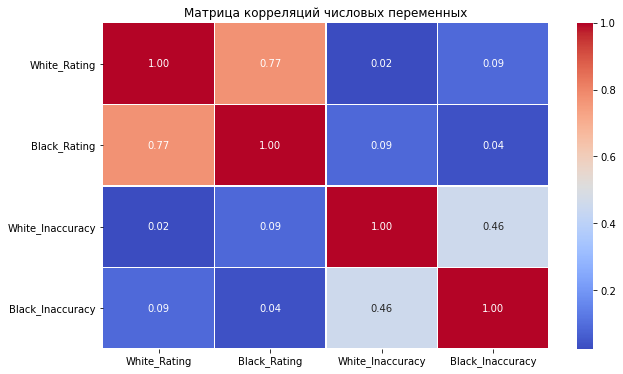

In [10]:
correlation_matrix = df_filtered.filter(items=columns_for_eda).select_dtypes(include=[np.number]).corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f",
            cmap="coolwarm", linewidths=0.5)
plt.title("Матрица корреляций числовых переменных")
plt.show()

Проверяем типы данных в колонках

In [11]:
df_filtered.dtypes

Game_ID              object
Rated                  bool
White_Rating        float64
Black_Rating        float64
White_Inaccuracy      int64
Black_Inaccuracy      int64
Opening_Name         object
Clocks               object
Moves                object
dtype: object

Проверяем пропуски в данных

In [12]:
print(df_filtered.isnull().sum())

Game_ID               0
Rated                 0
White_Rating          0
Black_Rating          0
White_Inaccuracy      0
Black_Inaccuracy      0
Opening_Name        322
Clocks                0
Moves                 0
dtype: int64


Разбираемся с колонкой White_Rating

In [13]:
df_filtered['White_Rating'].describe()


count    134761.000000
mean       2559.973242
std         349.163792
min         599.000000
25%        2304.000000
50%        2600.000000
75%        2812.000000
max        3438.000000
Name: White_Rating, dtype: float64

In [14]:
# Вычисление среднего значения для колонки 
#mean_A = df['White_Rating'].mean()

# Замена пропусков в колонке 'A' на среднее значение
#df_filtered['White_Rating'].fillna(mean_A, inplace=True)

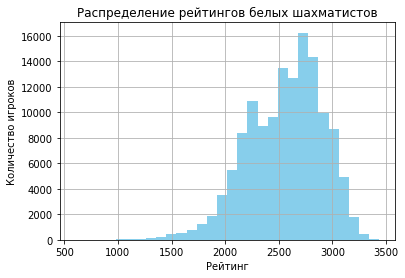

In [15]:
# Построение гистограммы для колонки 'White_Rating'
plt.hist(df_filtered['White_Rating'], bins=30, color='skyblue')
plt.title('Распределение рейтингов белых шахматистов')
plt.xlabel('Рейтинг')
plt.ylabel('Количество игроков')
plt.grid(True)

# Отображение графика
plt.show()

Посмотрим выбросы в колонке White_Rating

In [16]:
# Вычисление квартиля
Q1 = df_filtered['White_Rating'].quantile(0.25)
Q3 = df_filtered['White_Rating'].quantile(0.75)
IQR = Q3 - Q1

# Определение границ для выявления выбросов
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Поиск выбросов
outliers_wr = df_filtered[(df_filtered['White_Rating'] < lower_bound) | (df_filtered['White_Rating'] > upper_bound)]

# Выводим только колонку с выбросами
outlier_column = outliers_wr['White_Rating']
print(outlier_column)

208       1442.0
332       1435.0
347       1540.0
416       1061.0
417        920.0
           ...  
140749    1380.0
140752    1470.0
140778    1200.0
140788    1532.0
140790    1309.0
Name: White_Rating, Length: 955, dtype: float64


In [17]:
print(lower_bound)
print(upper_bound)

1542.0
3574.0


Удаляем все выбросы до рейтинга 1542 и после рейтинга 3574

In [18]:
# Шаг 4: Удаление выбросов
df_no_outliers_wr = df_filtered[(df_filtered['White_Rating'] >= lower_bound) & (df_filtered['White_Rating'] <= upper_bound)]

In [19]:
df_no_outliers_wr.shape

(133806, 9)

Разбираемся с колонкой Black_Rating

In [20]:
df_no_outliers_wr['Black_Rating'].describe()


count    133806.000000
mean       2564.955421
std         342.282359
min         689.000000
25%        2310.000000
50%        2600.000000
75%        2813.000000
max        3441.000000
Name: Black_Rating, dtype: float64

In [21]:
# Вычисление среднего значения для колонки 
#mean_B = df_filtered['Black_Rating'].mean()

# Замена пропусков в колонке 'A' на среднее значение
#df_filtered['Black_Rating'].fillna(mean_B, inplace=True)

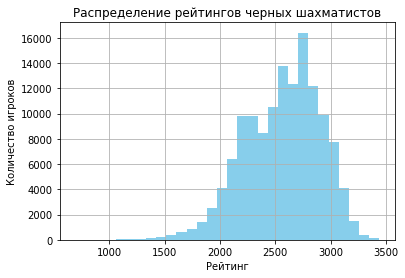

In [22]:
# Построение гистограммы для колонки 'Black_Rating'
plt.hist(df_no_outliers_wr['Black_Rating'], bins=30, color='skyblue')
plt.title('Распределение рейтингов черных шахматистов')
plt.xlabel('Рейтинг')
plt.ylabel('Количество игроков')
plt.grid(True)

# Отображение графика
plt.show()

Посмотрим выбросы в колонке Black_Rating'

In [23]:
# Вычисление квартиля
Q1 = df_no_outliers_wr['Black_Rating'].quantile(0.25)
Q3 = df_no_outliers_wr['Black_Rating'].quantile(0.75)
IQR = Q3 - Q1

# Определение границ для выявления выбросов
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Поиск выбросов
outliers_br = df_no_outliers_wr[(df_no_outliers_wr['Black_Rating'] < lower_bound) | (df_no_outliers_wr['Black_Rating'] > upper_bound)]

# Выводим только колонку с выбросами
outlier_column = outliers_br['Black_Rating']
print(outlier_column)

179       1546.0
186       1536.0
207       1495.0
333       1081.0
385       1544.0
           ...  
140768    1543.0
140779    1382.0
140785    1339.0
140789    1468.0
140791    1500.0
Name: Black_Rating, Length: 678, dtype: float64


In [24]:
print(lower_bound)
print(upper_bound)

1555.5
3567.5


Удаляем все выбросы до рейтинга 1555.5 и после рейтинга 3567.5

In [25]:
# Шаг 4: Удаление выбросов
df_no_outliers = df_no_outliers_wr[(df_no_outliers_wr['Black_Rating'] >= lower_bound) & (df_no_outliers_wr['Black_Rating'] <= upper_bound)]

In [26]:
df_no_outliers.shape

(133128, 9)

Разбираемся с колонкой White_Inaccuracy - количество неточностей, допущенных белым игроком

In [27]:
df_no_outliers['White_Inaccuracy'].describe()

count    133128.000000
mean          2.965267
std           2.276561
min           0.000000
25%           1.000000
50%           3.000000
75%           4.000000
max          20.000000
Name: White_Inaccuracy, dtype: float64

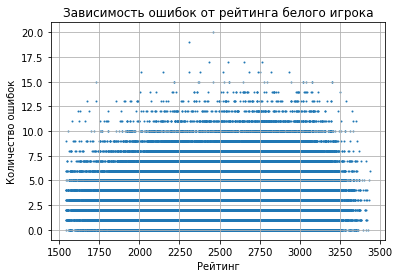

In [28]:
# Построение диаграммы рассеяния
plt.scatter(df_no_outliers['White_Rating'], df_no_outliers['White_Inaccuracy'], s=1)

plt.title('Зависимость ошибок от рейтинга белого игрока')
plt.xlabel('Рейтинг')
plt.ylabel('Количество ошибок')
plt.grid(True)

plt.show()

Посмотрим как распределились неточности белого игрока по количеству игр

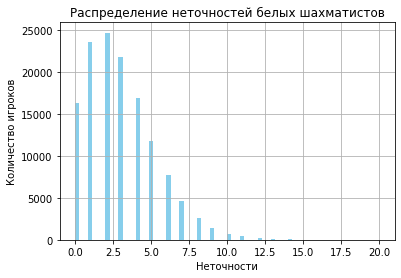

In [29]:
# Построение гистограммы для колонки 'White_Inaccuracy'
plt.hist(df_no_outliers['White_Inaccuracy'], bins=70, color='skyblue')
plt.title('Распределение неточностей белых шахматистов')
plt.xlabel('Неточности')
plt.ylabel('Количество игроков')
plt.grid(True)

# Отображение графика
plt.show()

Определение выбросов в колонке White_Inaccuracy

In [30]:
# Вычисление квартиля
Q1 = df_no_outliers['White_Inaccuracy'].quantile(0.25)
Q3 = df_no_outliers['White_Inaccuracy'].quantile(0.75)
IQR = Q3 - Q1

# Определение границ для выявления выбросов
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Поиск выбросов
outliers_white = df_no_outliers[
    (df_no_outliers['White_Inaccuracy'] < lower_bound) |
    (df_no_outliers['White_Inaccuracy'] > upper_bound)]
# Выводим только колонку с выбросами
outlier_column = outliers_white['White_Inaccuracy']
print(outlier_column)

41        16
47         9
100       14
108        9
128       10
          ..
140616    10
140650    11
140684     9
140732    10
140759    11
Name: White_Inaccuracy, Length: 2971, dtype: int64


In [31]:
# Шаг 4: Удаление выбросов
df_clear_wr = df_no_outliers[(df_no_outliers['White_Inaccuracy'] >= lower_bound) & (df_no_outliers['White_Inaccuracy'] <= upper_bound)]

In [32]:
df_clear_wr.shape

(130157, 9)

Разбираемся с колонкой Black_Inaccuracy - количество неточностей, допущенных черным игроком

In [33]:
df_clear_wr['Black_Inaccuracy'].describe()

count    130157.000000
mean          2.917761
std           2.185010
min           0.000000
25%           1.000000
50%           3.000000
75%           4.000000
max          17.000000
Name: Black_Inaccuracy, dtype: float64

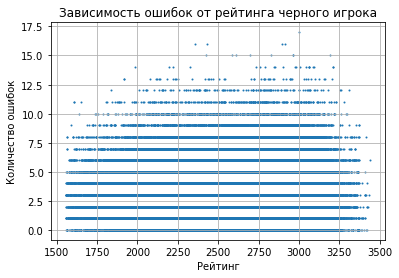

In [34]:
# Построение диаграммы рассеяния
plt.scatter(df_clear_wr['Black_Rating'], df_clear_wr['Black_Inaccuracy'], s=1)

plt.title('Зависимость ошибок от рейтинга черного игрока')
plt.xlabel('Рейтинг')
plt.ylabel('Количество ошибок')
plt.grid(True)

plt.show()

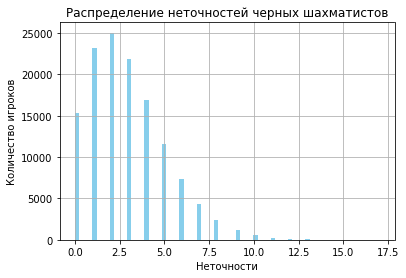

In [35]:
# Построение гистограммы для колонки 'Black_Inaccuracy'
plt.hist(df_clear_wr['Black_Inaccuracy'], bins=70, color='skyblue')
plt.title('Распределение неточностей черных шахматистов')
plt.xlabel('Неточности')
plt.ylabel('Количество игроков')
plt.grid(True)

# Отображение графика
plt.show()

Определение выбросов в колонке Black_Inaccuracy

In [36]:
# Вычисление квартиля
Q1 = df_clear_wr['Black_Inaccuracy'].quantile(0.25)
Q3 = df_clear_wr['Black_Inaccuracy'].quantile(0.75)
IQR = Q3 - Q1

# Определение границ для выявления выбросов
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Поиск выбросов
outliers_black = df_clear_wr[(df_clear_wr['Black_Inaccuracy'] < lower_bound) | (df_clear_wr['Black_Inaccuracy'] > upper_bound)]

# Выводим только колонку с выбросами
outlier_column = outliers_black['Black_Inaccuracy']
print(outlier_column)

33         9
124       10
153       11
175        9
263       10
          ..
140496    10
140532     9
140693     9
140713    10
140724    10
Name: Black_Inaccuracy, Length: 2281, dtype: int64


In [37]:
# Шаг 4: Удаление выбросов
df_clear = df_clear_wr[(df_clear_wr['Black_Inaccuracy'] >= lower_bound) & (df_clear_wr['Black_Inaccuracy'] <= upper_bound)]

In [38]:
df_clear.shape

(127876, 9)

Посмотрим на колонку Opening_Name - название дебюта, который был сыгран

In [39]:
df_clear['Opening_Name'].value_counts()

Indian Defense                                                                 1725
Sicilian Defense: Closed                                                       1459
Zukertort Opening                                                              1179
King's Indian Attack                                                           1178
Zukertort Opening: Kingside Fianchetto                                         1076
                                                                               ... 
Ruy Lopez: Bird Variation, Paulsen Variation                                      1
Alekhine Defense: Scandinavian Variation, Myers Gambit                            1
Zukertort Opening: Arctic Defense, Drunken Knight Variation                       1
Nimzo-Indian Defense: Classical Variation, Berlin Variation, Macieja System       1
Philidor Defense: Nimzowitsch, Larobok Variation                                  1
Name: Opening_Name, Length: 2279, dtype: int64

Попробуем заменить пропуски в колонке Opening_Name

In [40]:
# Функция для обрезки ходов до нужного количества
def trim_moves(moves, num_moves):
    # Разбиваем строку на отдельные ходы
    move_list = moves.split()
    # Обрезаем до нужного количества ходов
    trimmed_moves = ' '.join(move_list[:num_moves])
    return trimmed_moves

# Создаем явную копию для работы
df_clear = df_clear.copy()

# Применяем функцию к столбцу 'Moves', обрезая до 2-х ходов
df_clear.loc[:, 'TrimmedMoves'] = df_clear['Moves'].apply(lambda x: trim_moves(x, 2))

print("\nDataFrame после обрезки ходов:")
print(df_clear)



DataFrame после обрезки ходов:
         Game_ID  Rated  White_Rating  Black_Rating  White_Inaccuracy  \
0       PsevV6VH   True        2334.0        2272.0                 1   
1       diLZa8sj   True        2111.0        2272.0                 3   
2       O8TSZ7bq   True        2158.0        2259.0                 4   
3       vtMjWIUv   True        2299.0        2252.0                 0   
4       GC8I3jiq   True        2299.0        2251.0                 0   
...          ...    ...           ...           ...               ...   
140782  3BfRgZMW   True        2125.0        2138.0                 5   
140783  uUIODOLE   True        2115.0        1702.0                 5   
140784  YGQMCsEt   True        2106.0        1709.0                 1   
140786  FJJJFwXH   True        2006.0        1626.0                 4   
140787  nFPldl4M   True        1786.0        1949.0                 2   

        Black_Inaccuracy                                       Opening_Name  \
0           

In [41]:
# Создаем словарь из DataFrame
opening_dict = df_clear.set_index('TrimmedMoves')['Opening_Name'].to_dict()

print("\nСловарь дебютов:")
print(opening_dict)


Словарь дебютов:
{'Nf3 c5': 'Zukertort Opening: Sicilian Invitation', 'e4 e6': "French Defense: Queen's Knight", 'd4 Nf6': 'Indian Defense: Normal Variation', 'Nf3 Nf6': "King's Indian Defense: Normal Variation, King's Knight Variation", 'e4 c6': 'Caro-Kann Defense', 'e4 c5': 'Sicilian Defense: Closed', 'e4 e5': "Petrov's Defense: Modern Attack", 'e4 Nc6': 'Nimzowitsch Defense', 'e4 d5': 'Scandinavian Defense', 'e4 b6': 'Owen Defense', 'e4 g6': 'Modern Defense: Standard Line', 'e4 d6': 'Rat Defense: Antal Defense', 'd4 d5': "Queen's Gambit Declined: Austrian Defense", 'Nf3 d5': 'English Opening: Agincourt Defense, Catalan Defense, Semi-Slav Defense', 'd4 c5': 'Caro-Kann Defense: Exchange Variation', 'c4 e5': 'English Opening: The Whale', 'd4 d6': "Queen's Pawn Game", 'c4 d6': 'English Opening', 'Nf3 g6': 'Zukertort Opening: Kingside Fianchetto', 'Nf3 e6': 'English Opening: Agincourt Defense, Neo-Catalan Declined', 'c4 c6': 'English Opening: Caro-Kann Defensive System', 'g3 d5': "King'

In [42]:
# Функция для определения дебюта по обрезанным ходам
def determine_opening(trimmed_moves):
    return opening_dict.get(trimmed_moves, None)

# Заполняем пропуски в столбце 'Opening' на основе обрезанных ходов
df_clear['Opening_Name'] = df_clear['TrimmedMoves'].apply(determine_opening)

print("\nDataFrame после определения дебютов:")
print(df_clear)


DataFrame после определения дебютов:
         Game_ID  Rated  White_Rating  Black_Rating  White_Inaccuracy  \
0       PsevV6VH   True        2334.0        2272.0                 1   
1       diLZa8sj   True        2111.0        2272.0                 3   
2       O8TSZ7bq   True        2158.0        2259.0                 4   
3       vtMjWIUv   True        2299.0        2252.0                 0   
4       GC8I3jiq   True        2299.0        2251.0                 0   
...          ...    ...           ...           ...               ...   
140782  3BfRgZMW   True        2125.0        2138.0                 5   
140783  uUIODOLE   True        2115.0        1702.0                 5   
140784  YGQMCsEt   True        2106.0        1709.0                 1   
140786  FJJJFwXH   True        2006.0        1626.0                 4   
140787  nFPldl4M   True        1786.0        1949.0                 2   

        Black_Inaccuracy                                       Opening_Name  \
0     

In [44]:
print(df_clear.isnull().sum())
# осталось все равно 223 пропусков, предлагаю их оставить как other


Game_ID               0
Rated                 0
White_Rating          0
Black_Rating          0
White_Inaccuracy      0
Black_Inaccuracy      0
Opening_Name        223
Clocks                0
Moves                 0
TrimmedMoves          0
dtype: int64


In [45]:
# Заполнение пропусков словом "other"
df_clear['Opening_Name'] = df_clear['Opening_Name'].fillna('other')

In [46]:
df_clear.shape

(127876, 10)

Манипуляции над колонкой Clock - информация о времени игроков по ходу партии в виде последовательного числового списка

In [47]:
import ast
# Функция для безопасного преобразования строки в список
def safe_literal_eval(value):
    if isinstance(value, str):  # Проверяем, является ли значение строкой
        try:
            return ast.literal_eval(value)
        except (ValueError, SyntaxError):
            return []  # Возвращаем пустой список в случае ошибки
    return value  # Если это не строка, возвращаем значение как есть

# Преобразование строки в список
df_clear['Clocks'] = df_clear['Clocks'].apply(safe_literal_eval)



In [48]:
# Функция для разделения на две группы
def split_even_odd(clock_list):
    group1 = [clock_list[i] for i in range(len(clock_list)) if i % 2 == 0]  # Четные индексы
    group2 = [clock_list[i] for i in range(len(clock_list)) if i % 2 != 0]  # Нечетные индексы
    return pd.Series([group1, group2])  # Возвращаем Series с двумя группами

# Применение функции и создание новых столбцов
df_clear[['Even_Clocks', 'Odd_Clocks']] = df_clear['Clocks'].apply(split_even_odd)



In [49]:
# Функция для вычисления разницы между соседними числами в Even_Clocks
def calculate_differences(group):
    return [abs(j - i) for i, j in zip(group[:-1], group[1:])]   # положительная Разница между соседними элементами

# Применение функции для вычисления разницы в Even_Clocks
df_clear['Even_Differences'] = df_clear['Even_Clocks'].apply(calculate_differences)
df_clear['Odd_Differences'] = df_clear['Odd_Clocks'].apply(calculate_differences)

# Проверка результата

print(df_clear)


         Game_ID  Rated  White_Rating  Black_Rating  White_Inaccuracy  \
0       PsevV6VH   True        2334.0        2272.0                 1   
1       diLZa8sj   True        2111.0        2272.0                 3   
2       O8TSZ7bq   True        2158.0        2259.0                 4   
3       vtMjWIUv   True        2299.0        2252.0                 0   
4       GC8I3jiq   True        2299.0        2251.0                 0   
...          ...    ...           ...           ...               ...   
140782  3BfRgZMW   True        2125.0        2138.0                 5   
140783  uUIODOLE   True        2115.0        1702.0                 5   
140784  YGQMCsEt   True        2106.0        1709.0                 1   
140786  FJJJFwXH   True        2006.0        1626.0                 4   
140787  nFPldl4M   True        1786.0        1949.0                 2   

        Black_Inaccuracy                                       Opening_Name  \
0                      5             Zukerto

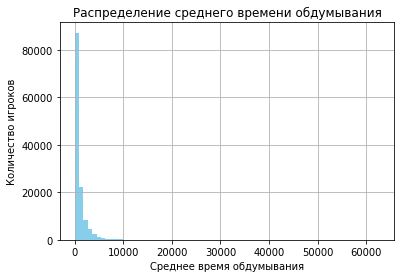

In [56]:
# Вычисление среднего значения для каждой строки в Odd_Differences
df_clear['Even_Averages'] = df_clear['Even_Differences'].apply(lambda x: sum(x) / len(x) if len(x) > 0 else 0)

# Построение графика
plt.hist(df_clear['Even_Averages'], bins=70, color='skyblue')
plt.title('Распределение среднего времени обдумывания белого игрока')
plt.xlabel('Среднее время обдумывания')
plt.ylabel('Количество игр')
plt.grid(True)

# Отображение графика
plt.show()

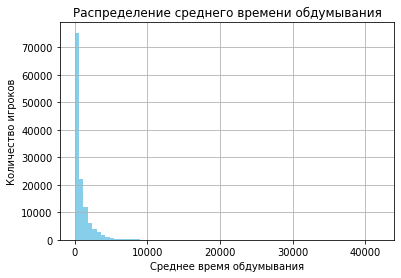

In [53]:
# Вычисление среднего значения для каждой строки в Odd_Differences
df_clear['Odd_Averages'] = df_clear['Odd_Differences'].apply(lambda x: sum(x) / len(x) if len(x) > 0 else 0)

# Построение графика
plt.hist(df_clear['Odd_Averages'], bins=70, color='skyblue')
plt.title('Распределение среднего времени обдумывания черного игрока')
plt.xlabel('Среднее время обдумывания')
plt.ylabel('Количество игр')
plt.grid(True)

# Отображение графика
plt.show()

